# 판다스를 이용한 데이터 전처리(추가)

***

In [1]:
# 아래의 라이브러리를 사용하므로 미리 임포트해 두기 바랍니다.
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')   # 한글폰트 설정 "맑은 고딕"
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

## 매핑

In [2]:
# 데이터 1 생성
data1 = {
    'id': ['100', '101', '102', '103', '104', '106', '108', '110', '111',' 113'],
    'city': ['Seoul', 'Pusan', 'Daegu', 'Gangneung', 'Seoul', 'Seoul', 'Pusan', 'Daegu', 'Gangneung', 'Seoul'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Junho', 'Heejin', 'Mijung', 'Minho', 'Steeve', 'Mina', 'Sumi', 'Minsu', 'Jinhee','Daeho']
}
df1 = DataFrame(data1)
df1

,id,city,birth_year,name
0,100,Seoul,1990,Junho
1,101,Pusan,1989,Heejin
2,102,Daegu,1992,Mijung
3,103,Gangneung,1997,Minho
4,104,Seoul,1982,Steeve
5,106,Seoul,1991,Mina
6,108,Pusan,1988,Sumi
7,110,Daegu,1990,Minsu
8,111,Gangneung,1995,Jinhee
9,113,Seoul,1981,Daeho


In [3]:
# 참조 데이터
city_map ={
    'Seoul': 'Sudo',
    'Gangneung': ' Yeondong',
    'Pusan': ' Yeongnam',
    'Daegu':' Yeongnam'
}
city_map

{'Seoul': 'Sudo',
 'Gangneung': ' Yeondong',
 'Pusan': ' Yeongnam',
 'Daegu': ' Yeongnam'}

In [4]:
city_map

{'Seoul': 'Sudo',
 'Gangneung': ' Yeondong',
 'Pusan': ' Yeongnam',
 'Daegu': ' Yeongnam'}

In [5]:
# 참조 데이터 결합
# 대응하는 데이터가 없으면 NaN이 됨
df1['region'] = df1['city'].map(city_map)
df1

,id,city,birth_year,name,region
0,100,Seoul,1990,Junho,Sudo
1,101,Pusan,1989,Heejin,Yeongnam
2,102,Daegu,1992,Mijung,Yeongnam
3,103,Gangneung,1997,Minho,Yeondong
4,104,Seoul,1982,Steeve,Sudo
5,106,Seoul,1991,Mina,Sudo
6,108,Pusan,1988,Sumi,Yeongnam
7,110,Daegu,1990,Minsu,Yeongnam
8,111,Gangneung,1995,Jinhee,Yeondong
9,113,Seoul,1981,Daeho,Sudo


In [7]:
# birth_year에서 오른쪽 2개의 숫자·문자를 추출
df1['last_two_num'] = df1['birth_year'].map(lambda x: str(x)[2:4])
df1

,id,city,birth_year,name,region,last_two_num
0,100,Seoul,1990,Junho,Sudo,90
1,101,Pusan,1989,Heejin,Yeongnam,89
2,102,Daegu,1992,Mijung,Yeongnam,92
3,103,Gangneung,1997,Minho,Yeondong,97
4,104,Seoul,1982,Steeve,Sudo,82
5,106,Seoul,1991,Mina,Sudo,91
6,108,Pusan,1988,Sumi,Yeongnam,88
7,110,Daegu,1990,Minsu,Yeongnam,90
8,111,Gangneung,1995,Jinhee,Yeondong,95
9,113,Seoul,1981,Daeho,Sudo,81


## 구간화 pd.cut()

In [8]:
#　구간 분할 단위
birth_year_bins = [1980, 1985, 1990, 1995, 2000]

# 구간 분할 실행
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins)
birth_year_cut_data

0    (1985, 1990]
1    (1985, 1990]
2    (1990, 1995]
3    (1995, 2000]
4    (1980, 1985]
5    (1990, 1995]
6    (1985, 1990]
7    (1985, 1990]
8    (1990, 1995]
9    (1980, 1985]
Name: birth_year, dtype: category
Categories (4, interval[int64, right]): [(1980, 1985] < (1985, 1990] < (1990, 1995] < (1995, 2000]]

In [9]:
# 집계 결과
pd.value_counts(birth_year_cut_data)

(1985, 1990]    4
(1990, 1995]    3
(1980, 1985]    2
(1995, 2000]    1
Name: birth_year, dtype: int64

In [11]:
# [X 이상 Y 미만) 구간으로 설정하기. pd.cut(right = False)
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins, right = False)
pd.value_counts(birth_year_cut_data)

[1990, 1995)    4
[1980, 1985)    2
[1985, 1990)    2
[1995, 2000)    2
Name: birth_year, dtype: int64

In [13]:
# 이름 붙이기
group_names = ['early1980s', 'late1980s', 'early1990s', 'late1990s']
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins, labels = group_names, right=False)
df1['years'] = birth_year_cut_data
df1

,id,city,birth_year,name,region,last_two_num,years
0,100,Seoul,1990,Junho,Sudo,90,early1990s
1,101,Pusan,1989,Heejin,Yeongnam,89,late1980s
2,102,Daegu,1992,Mijung,Yeongnam,92,early1990s
3,103,Gangneung,1997,Minho,Yeondong,97,late1990s
4,104,Seoul,1982,Steeve,Sudo,82,early1980s
5,106,Seoul,1991,Mina,Sudo,91,early1990s
6,108,Pusan,1988,Sumi,Yeongnam,88,late1980s
7,110,Daegu,1990,Minsu,Yeongnam,90,early1990s
8,111,Gangneung,1995,Jinhee,Yeondong,95,late1990s
9,113,Seoul,1981,Daeho,Sudo,81,early1980s


In [14]:
# 나눌 구간 수를 지정 가능. 여기에서는 두 개 구간으로 분할
pd.cut(df1.birth_year, 2)

0      (1989.0, 1997.0]
1    (1980.984, 1989.0]
2      (1989.0, 1997.0]
3      (1989.0, 1997.0]
4    (1980.984, 1989.0]
5      (1989.0, 1997.0]
6    (1980.984, 1989.0]
7      (1989.0, 1997.0]
8      (1989.0, 1997.0]
9    (1980.984, 1989.0]
Name: birth_year, dtype: category
Categories (2, interval[float64, right]): [(1980.984, 1989.0] < (1989.0, 1997.0]]

In [17]:
# 분위수를 기준으로 구간 지정. # 범위에 속하는 인원수를 최대한 맞게 맞춰줌 
pd.value_counts(pd.qcut(df1.birth_year, 2))

(1980.999, 1990.0]    6
(1990.0, 1997.0]      4
Name: birth_year, dtype: int64

In [18]:
df1.birth_year.median()

1990.000

## 결측값(NaN) 처리

In [19]:
# 라이브러리 임포트
import numpy as np
from numpy import nan as NA
import pandas as pd

# 데이터 생성
df = pd.DataFrame(np.random.rand(10, 4))

# NA으로 변경
df.iloc[1,0] = NA
df.iloc[2:3,2] = NA
df.iloc[5:,3] = NA

In [20]:
df

,0,1,2,3
0,0.099506,0.705893,0.264381,0.766013
1,NaN,0.701153,0.493410,0.449012
2,0.855982,0.510601,NaN,0.304546
3,0.282948,0.491867,0.607401,0.855803
4,0.066619,0.031881,0.639300,0.649547
5,0.364033,0.661777,0.371588,NaN
6,0.469041,0.944156,0.050827,NaN
7,0.928369,0.056033,0.004592,NaN
8,0.443448,0.056541,0.601967,NaN
9,0.342927,0.134411,0.404889,NaN


In [21]:
# 리스트와이즈 삭제: 결측값(NaN)이 있는 행을 모두 제거
df.dropna()

,0,1,2,3
0,0.099506,0.705893,0.264381,0.766013
3,0.282948,0.491867,0.607401,0.855803
4,0.066619,0.031881,0.639300,0.649547


In [22]:
# 페어와이즈 삭제: 지정된 열에서 결측값(NaN)이 포함한 행을 제거
df[[0,1]].dropna()

,0,1
0,0.099506,0.705893
2,0.855982,0.510601
3,0.282948,0.491867
4,0.066619,0.031881
5,0.364033,0.661777
6,0.469041,0.944156
7,0.928369,0.056033
8,0.443448,0.056541
9,0.342927,0.134411


In [23]:
# 결측값 채우기 (특정값 지정)
df.fillna(0)

,0,1,2,3
0,0.099506,0.705893,0.264381,0.766013
1,0.000000,0.701153,0.493410,0.449012
2,0.855982,0.510601,0.000000,0.304546
3,0.282948,0.491867,0.607401,0.855803
4,0.066619,0.031881,0.639300,0.649547
5,0.364033,0.661777,0.371588,0.000000
6,0.469041,0.944156,0.050827,0.000000
7,0.928369,0.056033,0.004592,0.000000
8,0.443448,0.056541,0.601967,0.000000
9,0.342927,0.134411,0.404889,0.000000


In [24]:
# 결측값 채우기 (직전 행의 값 사용)
df.fillna(method = 'ffill')

,0,1,2,3
0,0.099506,0.705893,0.264381,0.766013
1,0.099506,0.701153,0.493410,0.449012
2,0.855982,0.510601,0.493410,0.304546
3,0.282948,0.491867,0.607401,0.855803
4,0.066619,0.031881,0.639300,0.649547
5,0.364033,0.661777,0.371588,0.649547
6,0.469041,0.944156,0.050827,0.649547
7,0.928369,0.056033,0.004592,0.649547
8,0.443448,0.056541,0.601967,0.649547
9,0.342927,0.134411,0.404889,0.649547


In [25]:
# 각 컬럼의 평균값(확인용)
df.mean()

0    0.428097
1    0.429431
2    0.382039
3    0.604984
dtype: float64

In [26]:
# 결측값 채우기 (평균값으로 대체하기)
df.fillna(df.mean())

,0,1,2,3
0,0.099506,0.705893,0.264381,0.766013
1,0.428097,0.701153,0.493410,0.449012
2,0.855982,0.510601,0.382039,0.304546
3,0.282948,0.491867,0.607401,0.855803
4,0.066619,0.031881,0.639300,0.649547
5,0.364033,0.661777,0.371588,0.604984
6,0.469041,0.944156,0.050827,0.604984
7,0.928369,0.056033,0.004592,0.604984
8,0.443448,0.056541,0.601967,0.604984
9,0.342927,0.134411,0.404889,0.604984


---

# 교차표(cross-tab) 생성 및 시각화


---

In [27]:
data_raw = pd.read_csv('health2018.csv')
data_raw

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108


In [29]:
data = data_raw.head(50)
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
5,A901023304,F,71,157.2,53.2,78.4,21.528142,51
6,A901023501,M,44,180.0,85.6,96.1,26.419753,163
7,A901023502,F,42,168.8,54.2,70.3,19.021922,83
8,A901023901,M,36,172.6,69.0,84.2,23.161544,86
9,A901023902,F,30,153.9,54.7,78.8,23.094581,104


## 교차표(cross-tab) 생성 및 그룹간 빈도 비교 (카이 제곱 검정)

In [31]:
# pd.cut() 구간화 기능을 이용한 체중 분류
BMI_cut = [18.5, 25, 50]    # [18.5~25): 보통, [25~50): 비만
data['obesity'] = pd.cut(data.BMI, BMI_cut, labels = ['보통', '비만'], right = False)

Glucose_cut = [0, 126, 1000]    # [0~126): 정상, [126~1000): 당뇨
data['diabete'] = pd.cut(data.Blood_glucose, Glucose_cut, labels = ['정상', '당뇨'], right = False)
data.head()

C:\Users\pc\AppData\Local\Temp/ipykernel_15328/1765488149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['obesity'] = pd.cut(data.BMI, BMI_cut, labels = ['보통', '비만'], right = False)
C:\Users\pc\AppData\Local\Temp/ipykernel_15328/1765488149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diabete'] = pd.cut(data.Blood_glucose, Glucose_cut, labels = ['정상', '당뇨'], right = False)


,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity,diabete
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,보통,정상
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만,당뇨
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,보통,당뇨
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,보통,정상
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만,정상


In [32]:
# 교차표 생성: pd.crosstab()
pd.crosstab(data.sex, data.obesity)

obesity,보통,비만
sex,,
F,21,3
M,12,11


In [33]:
stats.chi2_contingency(pd.crosstab(data.sex, data.obesity))
#통계적 수치값 1에서 벗어날수록 차이있다
#우연히 이런 값이 나올 가능성
#

(5.420571201141854,
 0.019900848341626615,
 1,
 array([[16.851,  7.149],
        [16.149,  6.851]]))

<AxesSubplot:xlabel='sex', ylabel='count'>

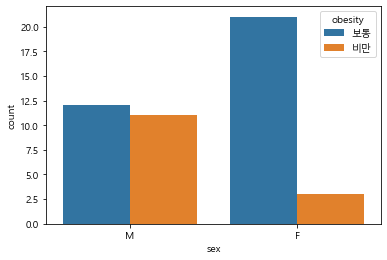

In [34]:
sns.countplot(data = data, x='sex', hue='obesity')

In [35]:
# 교차표 생성: 비만 x 혈당
pd.crosstab(data.obesity, data.diabete)

diabete,정상,당뇨
obesity,,
보통,29,4
비만,11,3


In [36]:
stats.chi2_contingency(pd.crosstab(data.obesity, data.diabete))

(0.13815514842300558,
 0.7101219761273089,
 1,
 array([[28.085,  4.915],
        [11.915,  2.085]]))

<AxesSubplot:xlabel='obesity', ylabel='count'>

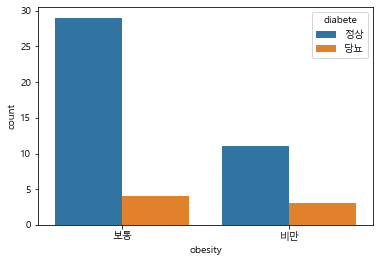

In [37]:
sns.countplot(data = data, x='obesity', hue='diabete')